In [1]:
import torch.utils.data
from torch.autograd import Variable
from torchvision import utils
from dataset import Dataset
from model import Model
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
model = Model()
step = model.load_max_step(('logs'))
print 'step = %d' % step

step = 2000


In [3]:
loader = torch.utils.data.DataLoader(Dataset('data/test.lmdb'), batch_size=16, shuffle=False)
iter_loader = enumerate(loader)

     labels: [3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8]
predictions: [3, 1, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8]


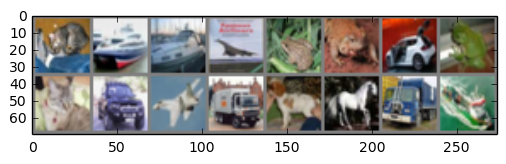

In [4]:
batch_idx, (images, labels) = iter_loader.next()
logits = model(Variable(images, volatile=True))
predictions = logits.data.max(1)[1]

grid_images = utils.make_grid(images)
grid_images = grid_images.numpy()
grid_images = np.transpose(grid_images, axes=[1, 2, 0])
grid_images = grid_images / 2.0 + 0.5

imshow(grid_images)
print '     labels:', labels.tolist()
print 'predictions:', predictions.squeeze().tolist()